In [3]:
import re
import os
import json
import numpy as np
from collections import OrderedDict
from matplotlib import pyplot as plt

In [99]:
log_dir = "../benchmark/results/"

In [124]:
def load_logs(env, algorithm):
    num_seeds = r"(\d*)"
    global_seed = r"(\d*)"
    time = r"(\d*).(\d*)"
    expr = f"{env}_{algorithm}_{num_seeds}_{global_seed}_{time}.json"

    files = [f for f in os.listdir(log_dir) if re.fullmatch(expr, f)]
    logs = []

    for f in files:
        with open(os.path.join(log_dir, f), "r") as f:
            log = json.load(f)
            if "time/process_time" in log.keys():
                logs.append(log)
    
    return logs

In [139]:
def plot_speedup(logs, ax=None, label=""):
    ax = plt.gca() if ax is None else ax

    # Plot speedup per seed
    sps = {}
    for log in logs:
        num_seeds = log["num_seeds"]
        process_time = log["time/process_time"][-1]
        sps[num_seeds] = process_time / num_seeds
    sps = OrderedDict(sorted(sps.items(), key=lambda x: x[0]))

    relative_sps = np.array(list(sps.values()))
    speedup = relative_sps[0] / relative_sps

    ax.plot(sps.keys(), speedup, marker="o", label=label)
    ax.set(
        xscale="log", 
        xticks=list(sps.keys()), 
        xticklabels=list(sps.keys()),
        xlabel="#seeds",
        ylabel="relative speedup",
    )
    ax.legend()

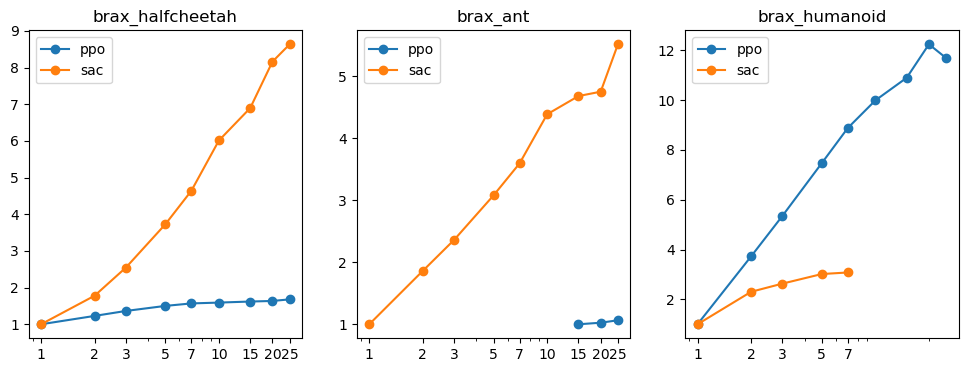

In [142]:
envs = ["brax_halfcheetah", "brax_ant", "brax_humanoid"]
fig, axes = plt.subplots(ncols=len(envs), figsize=(4 * len(envs), 4))

for ax, env in zip(axes, envs):
    for algo in "ppo", "sac":
        plot_speedup(load_logs(env, algo), ax=ax, label=algo)

    ax.set(title=env)